In [11]:
devtools::load_all(".")

library(FDclassifieR)

Loading FDclassifieR



In [12]:
Bank <- read.csv('data/bank.csv', sep=';')

inTraining0 <- createDataPartition(Bank$y, p = .75, list = FALSE)
training <- Bank[ inTraining0,]
testing  <- Bank[-inTraining0,]
testingY <- to_label(Bank[-inTraining0, ncol(Bank)])

In [19]:
table(testing$y)


  no  yes 
1000  130 

In [22]:
model_list <- c('nnet', 'rda', 'svmLinear', 'svmRadial', 'pls', 'earth', 'avNNet', 'mlp', 
                'rf', 'rpart', 'xgbTree', 'ctree', 'C5.0', 'gbm', 'bayesglm', 'earth', 'glm', 
                'avNNet', 'glmnet', 'simpls', 'xgbLinear','ctree', 'C5.0', 'gbm')

t1 <- mtrainer(model_list, dataInfo = 'Bank')

In [21]:
t1 <- train(t1, y~., training, update=F)

... train model with  20  algorithms


Training algorithm : nnet with : 15 cores



# weights:  617
initial  value 2568.154168 
iter  10 value 799.997923
iter  20 value 710.490996
iter  30 value 682.228424
iter  40 value 665.349934
iter  50 value 649.940422
iter  60 value 638.317866
iter  70 value 631.189927
iter  80 value 625.961161
iter  90 value 621.035208
iter 100 value 618.323980
final  value 618.323980 
stopped after 100 iterations


Training algorithm : rda with : 15 cores

Training algorithm : svmLinear with : 15 cores

Training algorithm : svmRadial with : 15 cores

Training algorithm : pls with : 15 cores

Training algorithm : earth with : 15 cores

Loading required package: earth

Loading required package: Formula

Loading required package: plotmo

Loading required package: plotrix

Loading required package: TeachingDemos

Training algorithm : avNNet with : 15 cores

Training algorithm : mlp with : 15 cores

Training algorithm : nb with : 15 cores



ERROR: Error in {: task 1 failed - "Not all variable names used in object found in newdata"


In [16]:
t1 <- t1 %>%
  addmodel.mtrainer(c('pls')) %>%
  train(y~., training, update=F)

... train model with  2  algorithms


Training algorithm : rda with : 15 cores

... using cached result: rda

Training algorithm : pls with : 15 cores

... using cached result: pls



2.761 sec elapsed


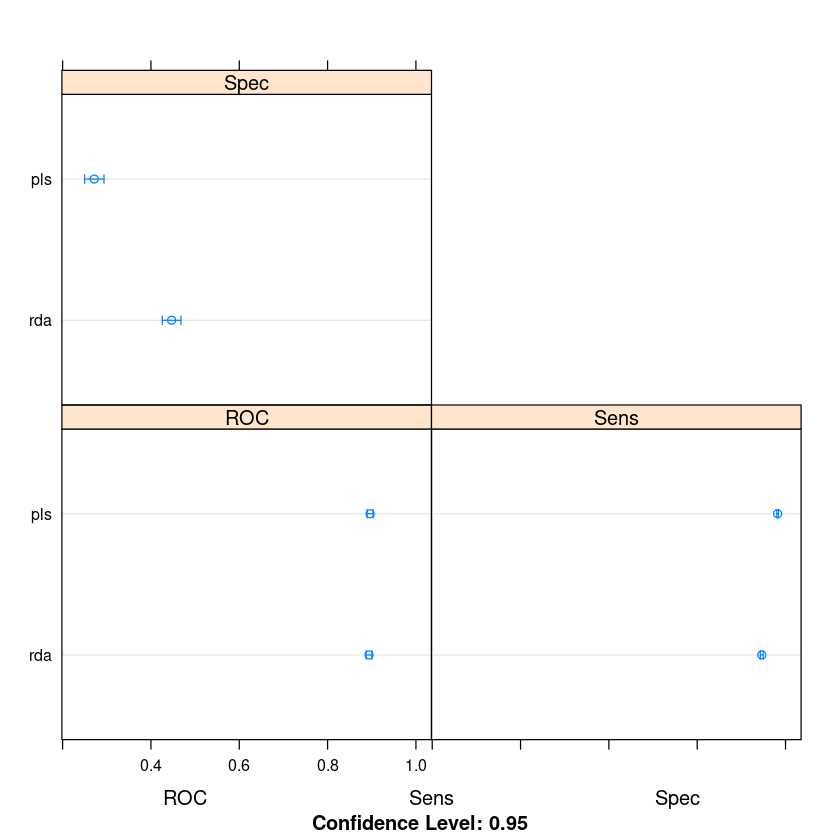

In [17]:
plot(t1)

In [18]:
t1 <- predict(t1, newdata=testing)

... predict using 2 base classifiers



ERROR: Error in mtrainer$predictions[, i] <- tmp[[1]][, class1]: replacement has length zero


In [ ]:
fde1 <- fde(t1$predictions)
fde1 <- calculate_performance(fde1, testingY, alpha=1)

In [18]:
plot_cor(fde1, class_flag = 'positive')

ERROR: Error in plot_cor(fde1, class_flag = "positive"): object 'fde1' not found


In [19]:
plot_performance(fde1, nsample=3, trendline=T)

ERROR: Error in plot_performance(fde1, nsample = 3, trendline = T): object 'fde1' not found


In [20]:
plot_performance_nmethods(fde1, nmethod_list = 1:2, nsample=2)

ERROR: Error in sample(1:.Object@nmethods, j): object 'fde1' not found


In [21]:
plot_single(fde1, 'score')

ERROR: Error in plot_single(fde1, "score"): object 'fde1' not found


In [17]:
store.mtrainer(t1, 'sonar_m8_pre.RData')

... save predictions to  sonar_m8_pre.RData 
